## **Part 2: A Continuous-Time Model**

In [26]:
# Plotting
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
import plotly.io as pio
import matplotlib.pyplot as plt
#pio.renderers.default = "notebook+pdf"
#pio.templates.default = "plotly_dark"

# Utilities
import numpy as np
import scipy.linalg as la

### **Task 7**

In [61]:
Q = np.array([
    [-0.0085, 0.005, 0.0025, 0, 0.001],
    [0, -0.014, 0.005, 0.004, 0.005],
    [0, 0, -0.008, 0.003, 0.005],
    [0, 0, 0, -0.009, 0.009],
    [0, 0, 0, 0, 0]
])
Qs = Q[:-1, :-1]
Qdiag = np.diag(Q)

def changeState(state, currentTime, endTime):
    if state == 4:
        return endTime, 4
    qii = Qdiag[state]
    if qii == 0:
        return endTime, state
    time = np.random.exponential(-(1/qii))
    if currentTime + time > endTime:
        return endTime, state
    # Determine the next state
    ps = np.copy(Q[state, :])
    ps[state] = 0
    ps /= -qii
    ps[state] = 1 - sum(ps)
    nextState = np.random.choice(range(5), p=ps)
    return time, nextState

def simulateWoman(startingState, endTime):
    state = startingState
    time = 0
    times = [0]
    states = [state]
    while state != 4 and time < endTime:
        dt, state = changeState(state, time, endTime)
        time += dt
        times.append(time)
        states.append(state)
    return np.array(times), np.array(states)

def simulateWomen(n, startingStates, endTime):
    women = []
    for i in range(n):
        times, states = simulateWoman(startingStates[i], endTime)
        women.append((times, states))
    return women

n = 1000
startingStates = np.zeros(n, dtype=int)

women = simulateWomen(n, startingStates, 30.5)


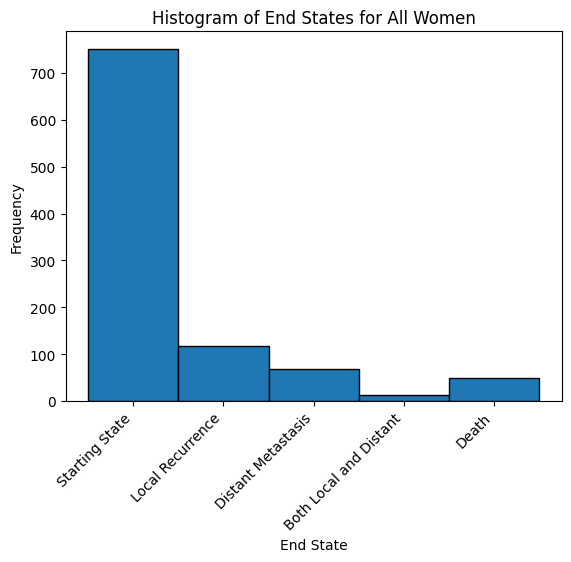

In [63]:
stateDescs = ['Starting State', 'Local Recurrence', 'Distant Metastasis', 'Both Local and Distant', 'Death']
# Make histogram of end states for all women
endStates = np.array([woman[1][-1] for woman in women], dtype=int)
plt.hist(endStates, bins=np.arange(0,6), edgecolor='black')
plt.title('Histogram of End States for All Women')
plt.xlabel('End State')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(0, 5)+0.5, labels=stateDescs, rotation=45, ha="right")
plt.show()

In [58]:
# print(-(Q[0,1] + Q[0,2] + Q[0,3] + Q[0,4]) / Q[0,0])
# print(-(Q[1,0] + Q[1,2] + Q[1,3] + Q[1,4]) / Q[1,1])
# print(-(Q[2,0] + Q[2,1] + Q[2,3] + Q[2,4]) / Q[2,2])
# print(-(Q[3,0] + Q[3,1] + Q[3,2] + Q[3,4]) / Q[3,3])
# print(-(Q[4,0] + Q[4,1] + Q[4,2] + Q[4,3]) / Q[4,4])

print(np.random.exponential(-(1/-0.0085), size = 10))

[ 53.51399851  81.98851105  49.33503975 279.422353    53.9952703
 410.64095709  86.6365785   18.50935775 311.7049922  104.57591653]


### **Task 8**

In [ ]:
def Ft(t, p0):
    F = 1 - p0 @ la.expm(Qs * t) @ np.ones(4)
    return F

### **Task 9**

### **Task 10**

### **Task 11**